In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
data= pd.read_excel("customers.xlsx")
data

,CustomerID,CustomerName,Email,Gender,Age,GeographyID
0,1,Emma Anderson,emma.anderson@example.com,Male,50,2
1,2,Sarah Brown,sarah.brown@example.com,Female,37,4
2,3,Robert Hernandez,robert.hernandez@example.com,Female,26,6
3,4,David Garcia,david.garcia@example.com,Male,25,8
4,5,Emma Miller,emma.miller@example.com,Female,41,4
...,...,...,...,...,...,...
95,96,Emily Gonzalez,emily.gonzalez@example.com,Female,38,10
96,97,Emily Rodriguez,emily.rodriguez@example.com,Female,51,3
97,98,Chris Lopez,chris.lopez@example.com,Female,55,10
98,99,Laura Hernandez,laura.hernandez@example.com,Male,41,5


In [7]:
data.isna().sum()

CustomerID      0
CustomerName    0
Email           0
Gender          0
Age             0
GeographyID     0
dtype: int64

In [8]:
average_age_by_gender = data.groupby("Gender")["Age"].mean()
average_age_by_gender

Gender
Female    42.981481
Male      40.826087
Name: Age, dtype: float64

Average Age: 41.99
Youngest Customer Age: 18
Oldest Customer Age: 69


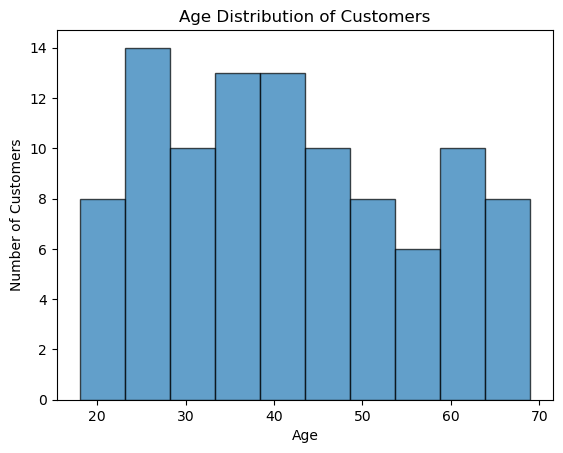

In [9]:
average_age = data["Age"].mean()
min_age = data["Age"].min()
max_age = data["Age"].max()

print(f"Average Age: {average_age:.2f}")
print(f"Youngest Customer Age: {min_age}")
print(f"Oldest Customer Age: {max_age}")

plt.hist(data["Age"], bins=10, edgecolor="black", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Age Distribution of Customers")
plt.show()


In [10]:
from collections import Counter

data["FirstName"] = data["CustomerName"].apply(lambda x: x.split()[0])
name_counts = Counter(data["FirstName"])
most_common_names = name_counts.most_common(5)

print("Top 5 Most Common First Names:")
for name, count in most_common_names:
    print(f"{name}: {count}")


Top 5 Most Common First Names:
Emma: 10
David: 9
Olivia: 9
James: 8
John: 8


In [11]:

customer_distribution = data["GeographyID"].value_counts().reset_index()
customer_distribution.columns = ["GeographyID", "CustomerCount"]

# Display results
print("Customer Distribution by GeographyID:")
print(customer_distribution)

# Identify highest and lowest presence regions
max_region = customer_distribution.iloc[0]  # Highest
min_region = customer_distribution.iloc[-1]  # Lowest

print(f"\nRegion with Highest Customers: GeographyID {max_region['GeographyID']} ({max_region['CustomerCount']} customers)")
print(f"Region with Lowest Customers: GeographyID {min_region['GeographyID']} ({min_region['CustomerCount']} customers)")


Customer Distribution by GeographyID:
   GeographyID  CustomerCount
0            4             18
1            5             12
2            2             11
3           10             10
4            1             10
5            6              9
6            7              9
7            8              8
8            9              8
9            3              5

Region with Highest Customers: GeographyID 4 (18 customers)
Region with Lowest Customers: GeographyID 3 (5 customers)


In [22]:
duplicate_emails = data[data.duplicated(subset="Email", keep=False)]
duplicate_names = data[data.duplicated(subset="CustomerName", keep=False)]
print("Duplicate Customers Based on Email:")
print(duplicate_emails[["CustomerID", "CustomerName", "Email"]])

print("\nDuplicate Customers Based on Name:")
print(duplicate_names[["CustomerID", "CustomerName", "Email"]])

Duplicate Customers Based on Email:
Empty DataFrame
Columns: [CustomerID, CustomerName, Email]
Index: []

Duplicate Customers Based on Name:
Empty DataFrame
Columns: [CustomerID, CustomerName, Email]
Index: []


In [28]:
avg_age_per_region = data.groupby("GeographyID")["Age"].mean().reset_index()

# Rename columns for clarity
avg_age_per_region.columns = ["GeographyID", "AverageAge"]

# Display results
print("Average Customer Age per GeographyID:")
print(avg_age_per_region)

Average Customer Age per GeographyID:
   GeographyID  AverageAge
0            1   45.200000
1            2   47.818182
2            3   49.800000
3            4   42.833333
4            5   34.416667
5            6   43.111111
6            7   44.333333
7            8   32.500000
8            9   37.625000
9           10   44.000000


In [30]:
gender_distribution = data.pivot_table(index="GeographyID", columns="Gender", values="CustomerID", aggfunc="count", fill_value=0)

# Rename columns for clarity
gender_distribution.columns = ["Female_Count", "Male_Count"]

# Reset index for readability
gender_distribution = gender_distribution.reset_index()

# Display results
print("Gender Distribution per GeographyID:")
print(gender_distribution)

Gender Distribution per GeographyID:
   GeographyID  Female_Count  Male_Count
0            1             3           7
1            2             7           4
2            3             2           3
3            4             9           9
4            5             8           4
5            6             7           2
6            7             5           4
7            8             4           4
8            9             4           4
9           10             5           5


In [24]:
bins = [0, 19, 29, 39, 49, 59, 69, 100]  # Age intervals
labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60-69", "70+"] 

# Create a new column for Age Group
data["AgeGroup"] = pd.cut(data["Age"], bins=bins, labels=labels, right=True)

# Find the most common age group per GeographyID
most_common_age_group = data.groupby("GeographyID")["AgeGroup"].agg(lambda x: x.mode()[0])

# Display results
print("Most Common Age Group per GeographyID:")
print(most_common_age_group.reset_index())


Most Common Age Group per GeographyID:
   GeographyID AgeGroup
0            1    60-69
1            2    40-49
2            3    50-59
3            4    40-49
4            5    20-29
5            6    20-29
6            7    30-39
7            8    20-29
8            9    20-29
9           10    30-39


In [26]:

# Extract email domain (everything after '@')
data["EmailDomain"] = data["Email"].apply(lambda x: x.split("@")[-1])

# Count occurrences of each domain
email_domain_counts = data["EmailDomain"].value_counts()

# Display results
print("Email Provider Distribution:")
print(email_domain_counts)


Email Provider Distribution:
EmailDomain
example.com    100
Name: count, dtype: int64


In [32]:
duplicate_names = data[data.duplicated(subset=["CustomerName"], keep=False)]
print(duplicate_names[["CustomerName", "Email"]])


Empty DataFrame
Columns: [CustomerName, Email]
Index: []


In [34]:
youngest = data.loc[data.groupby("GeographyID")["Age"].idxmin(), ["GeographyID", "CustomerName", "Age"]]
oldest = data.loc[data.groupby("GeographyID")["Age"].idxmax(), ["GeographyID", "CustomerName", "Age"]]
print("Youngest Customers per Region:\n", youngest)
print("Oldest Customers per Region:\n", oldest)

Youngest Customers per Region:
     GeographyID      CustomerName  Age
19            1     David Johnson   22
52            2       Emma Thomas   19
49            3     Olivia Miller   36
32            4      David Thomas   22
53            5  Michael Gonzalez   24
79            6       Laura Jones   25
5             7  Daniel Rodriguez   31
7             8    James Gonzalez   18
27            9       Emily Davis   18
75           10     Michael Lopez   26
Oldest Customers per Region:
     GeographyID       CustomerName  Age
41            1      John Gonzalez   69
39            2      Olivia Thomas   67
35            3       Emma Johnson   63
90            4         John Brown   62
38            5        Jane Miller   64
46            6      Sophia Thomas   69
84            7     Jane Hernandez   68
61            8  Michael Hernandez   60
55            9       Sophia Davis   66
50           10      Michael Davis   63
